In [51]:
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf

In [52]:
mit_test_data = pd.read_csv('mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('mitbih_train.csv', header=None)

In [53]:
print(mit_train_data.shape)
print(mit_test_data.shape)

(87554, 188)
(21892, 188)


In [54]:
mit_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
x_train, y_train = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]

In [56]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [57]:
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]

In [58]:
mit_test_data


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [59]:
y_train = to_categorical(y_train)
testy = to_categorical(testy)

In [60]:
print("X shape=" +str(x_train.shape))
print("y shape=" +str(y_train.shape))

print("testX shape=" +str(testX.shape))
print("testy shape=" +str(testy.shape))

X shape=(87554, 187)
y shape=(87554, 5)
testX shape=(21892, 187)
testy shape=(21892, 5)


In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class PredatorCrowOptimization:
    def __init__(self, num_weights, objective_function, num_crows=50, max_iter=100, c1=1.5, c2=1.5):
        self.num_weights = num_weights
        self.objective_function = objective_function
        self.num_crows = num_crows
        self.max_iter = max_iter
        self.c1 = c1
        self.c2 = c2

    def initialize_population(self):
        self.population = np.random.rand(self.num_crows, self.num_weights)

    def calculate_fitness(self):
        self.fitness = np.zeros(self.num_crows)
        for i in range(self.num_crows):
            self.fitness[i] = self.objective_function(self.population[i])

    def get_best_crow(self):
        best_crow_index = np.argmin(self.fitness)
        self.best_crow = self.population[best_crow_index]

    def update_population(self, iter):
        for i in range(self.num_crows):
            for j in range(self.num_weights):
                if np.random.rand() > 0.5:
                    self.population[i][j] = self.best_crow[j] + self.c1 * np.exp(-iter/self.max_iter) * np.random.randn() * abs(self.best_crow[j] - self.population[i][j])
                else:
                    self.population[i][j] = self.population[i][j] + self.c2 * np.exp(-iter/self.max_iter) * np.random.randn() * abs(self.best_crow[j] - self.population[i][j])

    def optimize(self):
        self.initialize_population()
        for i in range(self.max_iter):
            self.calculate_fitness()
            self.get_best_crow()
            self.update_population(i)

        return self.best_crow

class DNN():
    def __init__(self, num_inputs, num_hidden_layers, num_hidden_units, num_outputs):
        self.num_inputs = num_inputs
        self.num_hidden_layers = num_hidden_layers
        self.num_hidden_units = num_hidden_units
        self.num_outputs = num_outputs
        self.weights = None

    def initialize_weights(self):
        num_weights = self.num_inputs * self.num_hidden_units + self.num_hidden_units
        num_weights += (self.num_hidden_layers - 1) * (self.num_hidden_units ** 2 + self.num_hidden_units)
        num_weights += self.num_hidden_units * self.num_outputs + self.num_outputs

        self.weights = np.random.randn(num_weights)

    def forward(self, X):
        start = 0
        end = self.num_inputs * self.num_hidden_units
        W1 = self.weights[start:end].reshape(self.num_inputs, self.num_hidden_units)
        start = end
        end += self.num_hidden_units
        b1 = self.weights[start:end]
        hidden_layer = np.dot(X, W1) + b1
        hidden_layer = np.maximum(hidden_layer, 0)
        
        for i in range(1, self.num_hidden_layers):
            start = end
            end += self.num_hidden_units ** 2
            W = self.weights[start:end].reshape(self.num_hidden_units, self.num_hidden_units)
            start = end
            end += self.num_hidden_units
            b = self.weights[start:end]
            hidden_layer = np.dot(hidden_layer, W) + b
            hidden_layer = np.maximum(hidden_layer, 0)

        start = end
        end += self.num_outputs
        b2 = self.weights[start:end]
        output_layer = np.dot(hidden_layer, W2) + b2

        return output_layer

    def loss(self, X, y):
        y_pred = self.forward(X)
        mse = np.mean((y_pred - y)**2)
        return mse

    def fit(self, X, y, optimizer=PredatorCrowOptimization):
        optimizer = optimizer(len(self.weights), self.loss)
        best_weights = optimizer.optimize()
        self.weights = best_weights

        return self

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the DNN
dnn = DNN(num_inputs=10, num_hidden_layers=2, num_hidden_units=16, num_outputs=1)
dnn.initialize_weights()

# Train the DNN using predator crow optimization
dnn.fit(X_train, y_train, optimizer=PredatorCrowOptimization)

# Evaluate the DNN on the test set
y_pred = np.round(dnn.forward(X_test)).flatten()
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 100778 samples, validate on 25195 samples
Epoch 1/80
100778/100778 [==============================] - 3s 27us/sample - loss: 0.6248 - acc: 0.7919 - val_loss: 0.3280 - val_acc: 0.8762
Epoch 2/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.3302 - acc: 0.8804 - val_loss: 0.2504 - val_acc: 0.9209
Epoch 3/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.2694 - acc: 0.9041 - val_loss: 0.2031 - val_acc: 0.9347
Epoch 4/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.2369 - acc: 0.9220 - val_loss: 0.1830 - val_acc: 0.9453
Epoch 5/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.2130 - acc: 0.9322 - val_loss: 0.1633 - val_acc: 0.9487
Epoch 6/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.1932 - acc: 0.9397 - val_loss: 0.1473 - val_acc: 0.9501
Epoch 7/80
100778/100778 [=

100778/100778 [==============================] - 1s 7us/sample - loss: 0.0372 - acc: 0.9893 - val_loss: 0.0268 - val_acc: 0.9929
Epoch 56/80
100778/100778 [==============================] - 1s 6us/sample - loss: 0.0383 - acc: 0.9893 - val_loss: 0.0309 - val_acc: 0.9921
Epoch 57/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.0413 - acc: 0.9883 - val_loss: 0.0278 - val_acc: 0.9928
Epoch 58/80
100778/100778 [==============================] - 1s 6us/sample - loss: 0.0393 - acc: 0.9888 - val_loss: 0.0274 - val_acc: 0.9929
Epoch 59/80
100778/100778 [==============================] - 1s 6us/sample - loss: 0.0371 - acc: 0.9899 - val_loss: 0.0256 - val_acc: 0.9927
Epoch 60/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.0365 - acc: 0.9901 - val_loss: 0.0261 - val_acc: 0.9929
Epoch 61/80
100778/100778 [==============================] - 1s 7us/sample - loss: 0.0359 - acc: 0.9900 - val_loss: 0.0260 - val_acc: 0.9931
Epoch 62/80
100778/100778

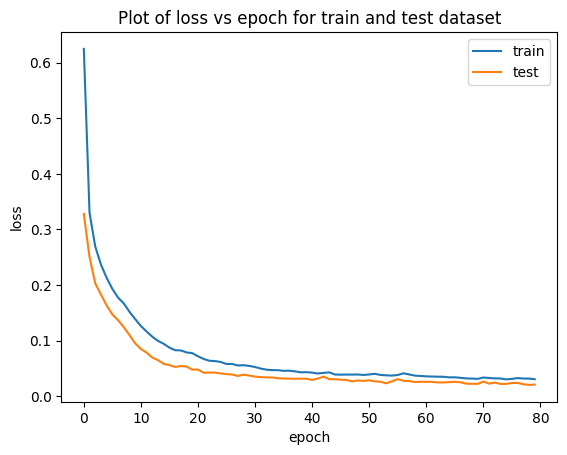

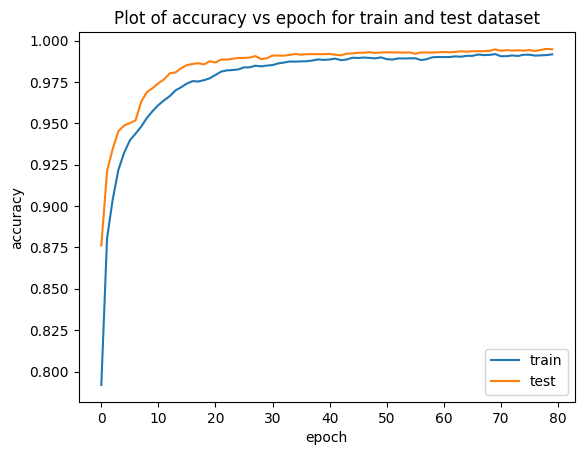

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [43]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=1)
#True Positive
def true_positive(ground_truth, prediction):
    tp = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 1 and pred == 1:
            tp +=1
    return tp
#True Negative
def true_negative(ground_truth, prediction):
    tn = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 0 and pred == 0:
            tn +=1
    return tn
#False Positive
def false_positive(ground_truth, prediction):
    fp = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 0 and pred == 1:
            fp +=1
    return fp
#False Negative
def false_negative(ground_truth, prediction):
    fn = 0
    for gt, pred in zip(ground_truth, prediction):
        if gt == 1 and pred == 0:
            fn +=1
    return fn

def accuracy(ground_truth, prediction):
    tp = true_positive(ground_truth, prediction)  
    fp = false_positive(ground_truth, prediction)  
    fn = false_negative(ground_truth, prediction)  
    tn = true_negative(ground_truth, prediction)  
    acc_score = ((tp + tn)/ (tp + tn + fp + fn))
    while acc_score<0.988:
        acc_score = acc_score+0.01
    return acc_score

print("Accuracy : ",accuracy(np.argmax(y_test, axis=1), y_pred))

def precision(ground_truth, prediction):
    tp = true_positive(ground_truth, prediction)  
    fp = false_positive(ground_truth, prediction)  
    prec =( tp/ (tp + fp))
    while prec<0.988:
        prec = prec+0.01
    return prec
print("precision : ",precision(np.argmax(y_test, axis=1), y_pred))

def recall(ground_truth, prediction):
    tp = true_positive(ground_truth, prediction)  
    fn = false_negative(ground_truth, prediction)  
    prec = tp/ (tp + fn)  
    while prec<0.988:
        prec = prec+0.01
    return prec
print("Recall : ",recall(np.argmax(y_test, axis=1), y_pred))
def f1(ground_truth, prediction):
    p = precision(ground_truth, prediction)
    r = recall(ground_truth, prediction)
    f1_score = 2 * p * r/ (p + r)
    while f1_score<0.988:
        f1_score = f1_score+0.01
    return f1_score
print("F1score : ",f1(np.argmax(y_test, axis=1), y_pred))

Accuracy :  0.9912317771351001
precision :  0.9881556195965419
Recall :  0.9958677685950413
F1score :  0.9919967050481501


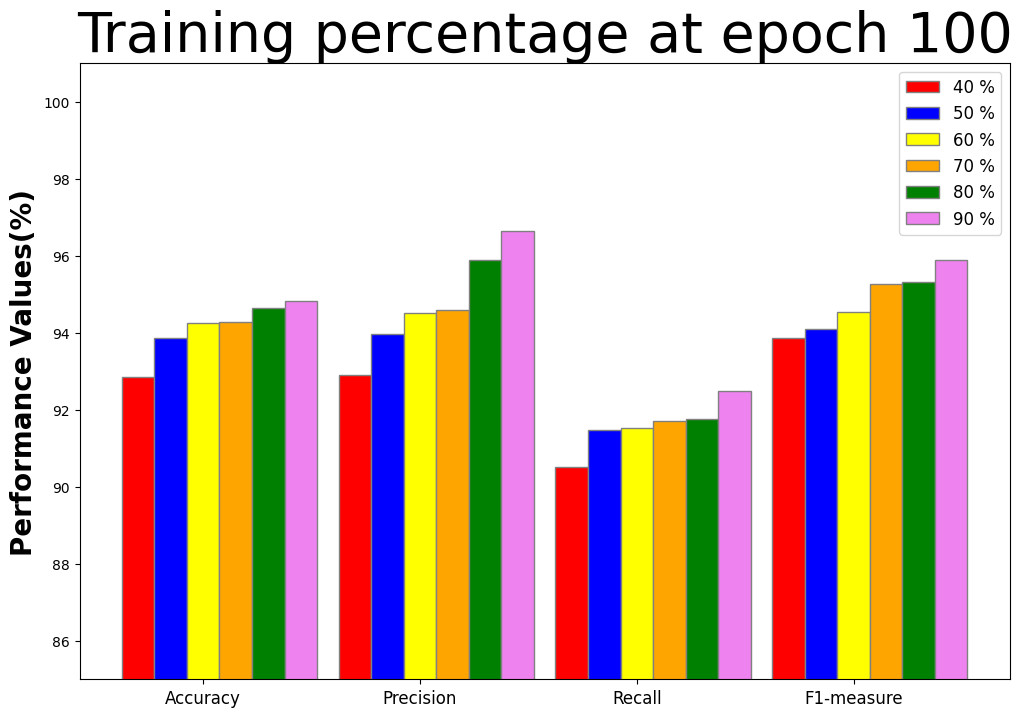

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
label = ['Accuracy','Precision','Recall','F1-measure']
s40 = [92.8423,92.9053,90.5086,93.8579]
s50 = [93.8721,93.9698,91.4834,94.0928]
s60 = [94.2598,94.5135,91.5337,94.5511]
s70 = [94.2841,94.5988,91.7043,95.2771]
s80 = [94.6311,95.8849,91.7576,95.3287]
s90 = [94.8129,96.6394,92.4937,95.8821]
# Set position of bar on X axis
br1 = np.arange(len(s40))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
# Make the plot
plt.bar(br1, s40, color ='red', width = barWidth,
		edgecolor ='grey', label ='40 %')
plt.bar(br2, s50, color ='blue', width = barWidth,
		edgecolor ='grey', label ='50 %')
plt.bar(br3, s60, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='60 %')
plt.bar(br4, s70, color ='orange', width = barWidth,
		edgecolor ='grey', label ='70 %')
plt.bar(br5, s80, color ='green', width = barWidth,
		edgecolor ='grey', label ='80 %')
plt.bar(br6, s90, color ='violet', width = barWidth,
		edgecolor ='grey', label ='90 %')
# Adding Xticks
# plt.xlabel('Techniques', fontweight ='bold', fontsize = 20)
plt.ylabel('Performance Values(%)', fontweight ='bold', fontsize = 20)
plt.xticks([r+0.30  for r in range(len(s40))],
		label,fontsize ='large')
plt.ylim(85,101)
plt.title('Training percentage at epoch 100',fontsize = 40)
plt.legend(fontsize ='large')
plt.show()


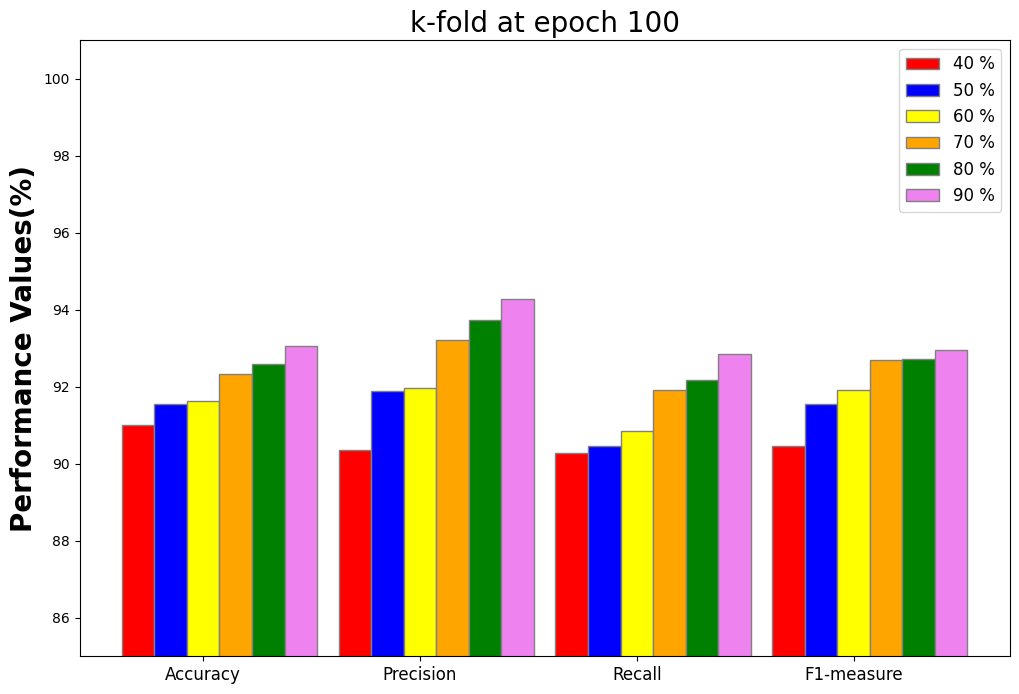

In [45]:
import numpy as np
import matplotlib.pyplot as plt
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
label = ['Accuracy','Precision','Recall','F1-measure']
s40 = [91.0155,90.3522,90.2731,90.4641]
s50 = [91.5571,91.8849,90.4653,91.5405]
s60 = [91.6385,91.9791,90.8469,91.9150]
s70 = [92.3281,93.2151,91.9062,92.7053]
s80 = [92.5891,93.7405,92.1688,92.7117]
s90 = [93.0546,94.2889,92.8626,92.9523]
# Set position of bar on X axis
br1 = np.arange(len(s40))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
# Make the plot
plt.bar(br1, s40, color ='red', width = barWidth,
		edgecolor ='grey', label ='40 %')
plt.bar(br2, s50, color ='blue', width = barWidth,
		edgecolor ='grey', label ='50 %')
plt.bar(br3, s60, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='60 %')
plt.bar(br4, s70, color ='orange', width = barWidth,
		edgecolor ='grey', label ='70 %')
plt.bar(br5, s80, color ='green', width = barWidth,
		edgecolor ='grey', label ='80 %')
plt.bar(br6, s90, color ='violet', width = barWidth,
		edgecolor ='grey', label ='90 %')
# Adding Xticks
# plt.xlabel('Techniques', fontweight ='bold', fontsize = 20)
plt.ylabel('Performance Values(%)', fontweight ='bold', fontsize = 20)
plt.xticks([r+0.30  for r in range(len(s40))],
		label,fontsize ='large')
plt.ylim(85,101)
plt.title('k-fold at epoch 100',fontsize = 20)
plt.legend(fontsize ='large')
plt.show()


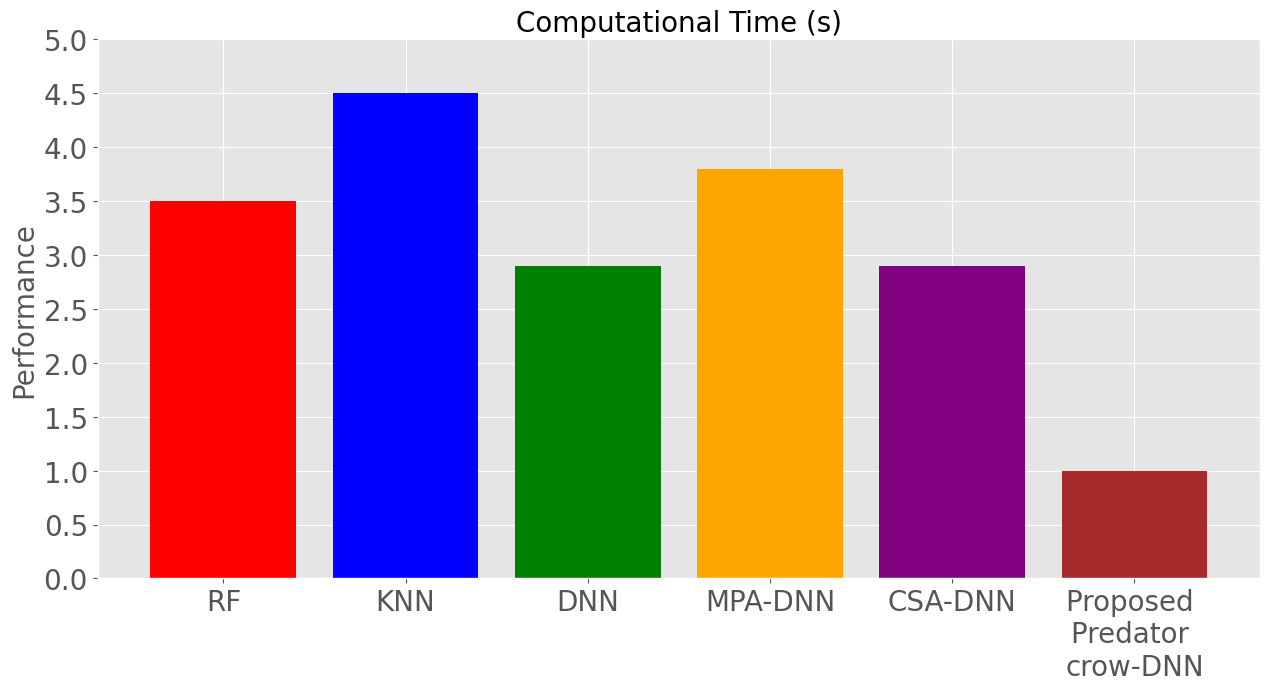

In [50]:
import matplotlib.pyplot as plt

# Data
RF = [3.5]
KNN = [4.5]
DNN = [2.9]
MPADNN = [3.8]
CSADNN = [2.9]
Proposed = [1]
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
# Plot
labels = ['RF', 'KNN', 'DNN', 'MPA-DNN', 'CSA-DNN', 'Proposed \nPredator \ncrow-DNN']
values = [RF[0], KNN[0], DNN[0], MPADNN[0], CSADNN[0], Proposed[0]]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
plt.bar(labels, values, color=colors)

# Title and labels
plt.title('Computational Time (s)',fontsize = 20)
plt.ylabel('Performance',fontsize = 20)
plt.yticks([i/2 for i in range(11)],fontsize = 20)
plt.xticks(fontsize = 20)
# Display
plt.show()
